# Curso Deep Learning Prático com TensorFlow e Python
26/06/2024

Importação das bibliotecas

In [83]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importação da base de dados

In [84]:
sales_data = pd.read_csv('SalesData.csv')
sales_data.reset_index(drop=True, inplace=True)
sales_data

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [127]:
sales_data[(sales_data['Temperature'] >= 10) & (sales_data['Temperature'] < 11)]

,Temperature,Revenue
54,10.326389,219.303993
160,10.245058,273.073342
203,10.447126,278.309844
209,10.096645,272.857021
294,10.403423,321.750034
392,10.119737,276.373374


In [128]:
# Filtrando o DataFrame
filtered_sales_data = sales_data[(sales_data['Temperature'] >= 10) & (sales_data['Temperature'] < 11)]

# Calculando a média da coluna 'Revenue'
average_revenue = filtered_sales_data['Revenue'].mean()

# Imprimindo o resultado
print(average_revenue)


273.61126815


In [85]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [86]:
sales_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [87]:
sales_data.shape

(500, 2)

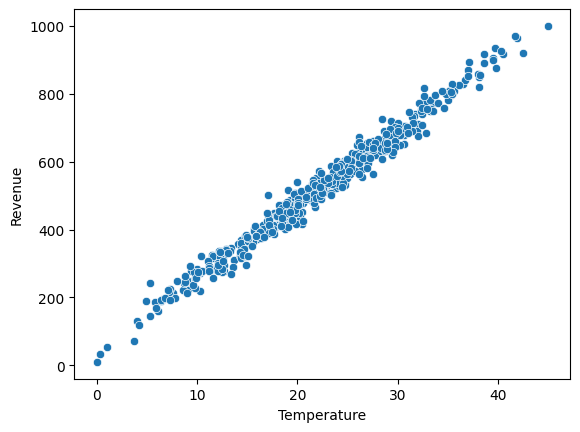

In [88]:
sns.scatterplot(x='Temperature', y='Revenue', data=sales_data);

Configuração da base de treino

In [89]:
X_train = sales_data['Temperature']
y_train = sales_data['Revenue']

Construção e treinamento do modelo

In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1,))
model.summary()

/home/michel/Documentos/PLANNER/deep_learning_prático_com_tensorflow_e_python/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [92]:
epochs_hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 242295.0000   
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13072.9014 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3383.9292
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1385.1171
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 952.8564 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 749.4745 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 697.7542 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 637.2903 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 763.6471  
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 652.1805 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 658.1130 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 632.3801 
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 634.3291 
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 602.6064 
Epoch 15/100
16/16 ━━━━━━━━━━━━━━

In [93]:
epochs_hist.history.keys()

dict_keys(['loss'])

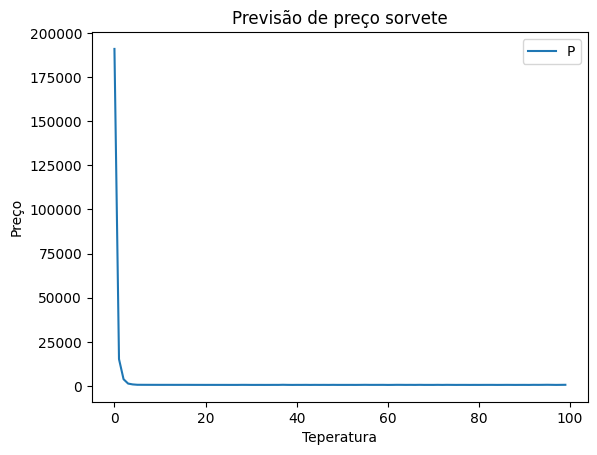

In [97]:
plt.plot(epochs_hist.history['loss'])
plt.title('Previsão de preço sorvete')
plt.xlabel('Teperatura')
plt.ylabel('Preço')
plt.legend('Preço')

In [95]:
model.get_weights()

[array([[-1.795324  , -0.00501329, -1.6859447 , -1.513839  , -2.424119  ,
         -0.04529457, -0.03528361,  1.8009955 , -0.3686542 , -1.6351099 ]],
       dtype=float32),
 array([-3.4601448 , -0.4984652 , -3.762253  , -3.1175966 , -3.896731  ,
        -0.34391943, -1.1566687 ,  3.7610838 , -1.1340053 , -3.1883092 ],
       dtype=float32),
 array([[-1.8303865 ],
        [-0.00803228],
        [-1.7631465 ],
        [-1.6586252 ],
        [-2.277     ],
        [ 0.01976396],
        [-0.12635593],
        [ 1.9858098 ],
        [-0.54479486],
        [-1.7112888 ]], dtype=float32),
 array([3.1475298], dtype=float32)]

In [98]:
temp_c = 5
temp_c_array = np.array([[temp_c]]) 
temp_f = model.predict(temp_c_array)
print(temp_f)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[148.18588]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


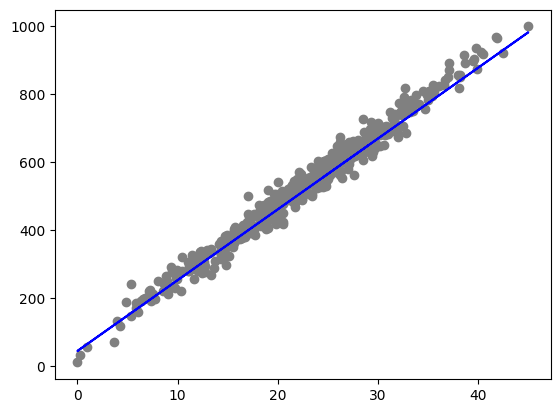

In [101]:
plt.scatter(x=X_train, y=y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='blue');

Confirmar os dados usando Sklearn

In [102]:
X_train.shape

(500,)

In [103]:
X_train = X_train.values.reshape(-1, 1)
X_train.shape

(500, 1)

In [104]:
y_train.shape

(500,)

In [105]:
y_train = y_train.values.reshape(-1,1)
y_train.shape

(500, 1)

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [109]:
regressor.coef_

array([[21.44362551]])

In [110]:
regressor.intercept_

array([44.83126709])

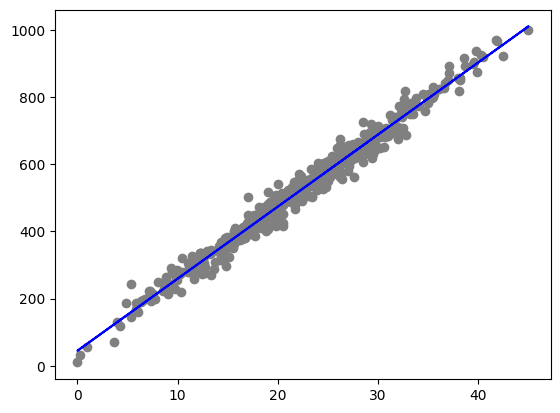

In [111]:
plt.scatter(x=X_train, y=y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='blue');

previsão

In [129]:
temp_c = 10
revenue = regressor.predict([[temp_c]])
print(revenue[0][0])

259.2675221973662
